In [2]:
# Importing the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
# Importing the dataset
df = pd.read_csv("wireless speakers rating.csv")

In [100]:
df.head()

,model,price,launch,overall,relaxing,party,movie,Month,Year
0,Bowers & Wilkins Formation Wedge,899,2019-06-01,160,158,155,134,6,2019
1,Harman Kardon Citation 200,349,2020-09-01,147,136,150,119,9,2020
2,Sonos Five,499,2021-06-01,147,141,148,123,6,2021
3,Bowers & Wilkins Zeppelin,799,2021-10-01,146,148,137,117,10,2021
4,Bang & Olufsen Beosound Balance,2250,2020-03-01,145,135,141,110,3,2020


In [5]:
df.shape

(45, 7)

In [6]:
# Understanding model columns : All are unique
df.model.nunique()

45

In [7]:
# Handling price column making it int and removing $ symbol
df['price'] = df['price'].apply(lambda x: x[1:]).astype(int)

In [25]:
## Most 10 Expensive wireless speakers
df_most_expensive = df[['model',"price"]].sort_values("price",ascending=False).head(10)

<AxesSubplot:xlabel='price', ylabel='model'>

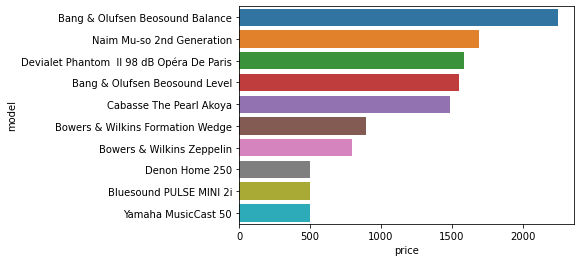

In [74]:
# Resetting index
df_most_expensive = df_most_expensive.reset_index().drop(columns=['index'])
sns.barplot(x= "price",y="model",data = df_most_expensive)

In [27]:
display(df_most_expensive)

,model,price
0,Bang & Olufsen Beosound Balance,2250
1,Naim Mu-so 2nd Generation,1690
2,Devialet Phantom II 98 dB Opéra De Paris,1590
3,Bang & Olufsen Beosound Level,1549
4,Cabasse The Pearl Akoya,1490
5,Bowers & Wilkins Formation Wedge,899
6,Bowers & Wilkins Zeppelin,799
7,Denon Home 250,499
8,Bluesound PULSE MINI 2i,499
9,Yamaha MusicCast 50,499


<AxesSubplot:xlabel='overall', ylabel='model'>

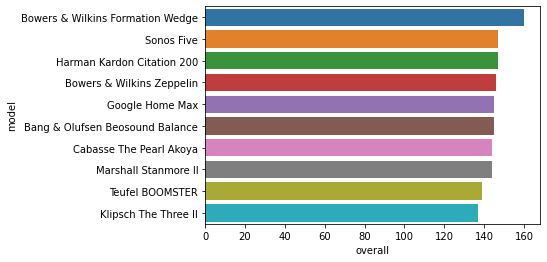

In [70]:
# Top 10 Highest overall rating Speakers 
df_best_overall_rating = df[['model','overall']].sort_values('overall',ascending=False).reset_index().drop(columns="index").head(10)
sns.barplot(x= "overall",y="model",data = df_best_overall_rating)

In [44]:
display(df_best_overall_rating)

,model,overall
0,Bowers & Wilkins Formation Wedge,160
1,Sonos Five,147
2,Harman Kardon Citation 200,147
3,Bowers & Wilkins Zeppelin,146
4,Google Home Max,145
5,Bang & Olufsen Beosound Balance,145
6,Cabasse The Pearl Akoya,144
7,Marshall Stanmore II,144
8,Teufel BOOMSTER,139
9,Klipsch The Three II,137


<AxesSubplot:xlabel='relaxing', ylabel='model'>

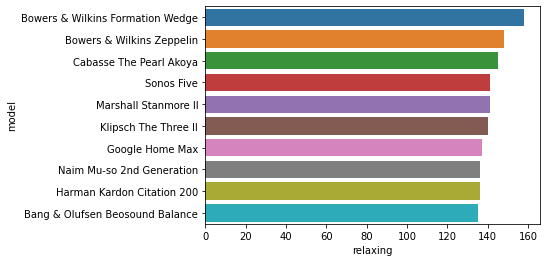

In [68]:
# Relaxing Music
df_relaxing = df[['model','relaxing']].sort_values('relaxing',ascending=False).reset_index().drop(columns="index").head(10)
sns.barplot(x= "relaxing",y="model",data = df_relaxing)

<AxesSubplot:xlabel='party', ylabel='model'>

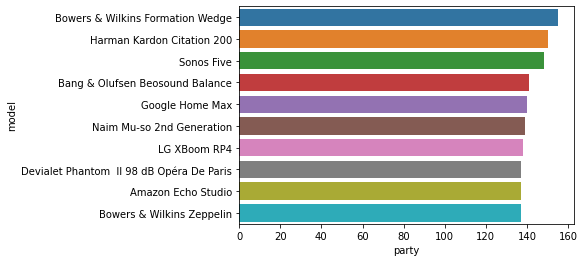

In [71]:
# Party Music 
df_party = df[['model','party']].sort_values('party',ascending=False).reset_index().drop(columns="index").head(10)
sns.barplot(x= "party",y="model",data = df_party)

<AxesSubplot:xlabel='movie', ylabel='model'>

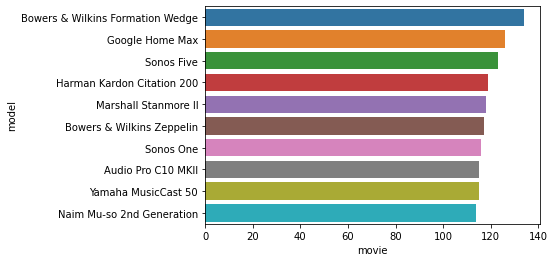

In [72]:
# Best Speakers for movie
df_movie = df[['model','movie']].sort_values('movie',ascending=False).reset_index().drop(columns="index").head(10)
sns.barplot(x= "movie",y="model",data = df_movie)

In [52]:
df_TheBest = df_best_overall_rating.merge(df_most_expensive,on = 'model',how='inner').merge(df_relaxing,on = 'model',how='inner').merge(df_party,on = 'model',how='inner').merge(df_movie,on = 'model',how='inner')

In [76]:
# Two best speakers in every aspects and both are from Bowers & Wilkins
df_TheBest

,model,overall,price,relaxing,party,movie
0,Bowers & Wilkins Formation Wedge,160,899,158,155,134
1,Bowers & Wilkins Zeppelin,146,799,148,137,117


In [78]:
df.head()

,model,price,launch,overall,relaxing,party,movie
0,Bowers & Wilkins Formation Wedge,899,Jun 2019,160,158,155,134
1,Harman Kardon Citation 200,349,Sep 2020,147,136,150,119
2,Sonos Five,499,Jun 2021,147,141,148,123
3,Bowers & Wilkins Zeppelin,799,Oct 2021,146,148,137,117
4,Bang & Olufsen Beosound Balance,2250,Mar 2020,145,135,141,110


In [79]:
#info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     45 non-null     object
 1   price     45 non-null     int32 
 2   launch    45 non-null     object
 3   overall   45 non-null     int64 
 4   relaxing  45 non-null     int64 
 5   party     45 non-null     int64 
 6   movie     45 non-null     int64 
dtypes: int32(1), int64(4), object(2)
memory usage: 2.4+ KB


In [83]:
# making launch date date time object
df["launch"] = pd.to_datetime(df['launch'])

# Extracting Month Details:
df["Month"] = df['launch'].dt.month

# Extracting Year Details:
df['Year'] = df['launch'].dt.year

In [84]:
# Checking the dataset after adding columns(Year, Month)
df.head()

,model,price,launch,overall,relaxing,party,movie,Month,Year
0,Bowers & Wilkins Formation Wedge,899,2019-06-01,160,158,155,134,6,2019
1,Harman Kardon Citation 200,349,2020-09-01,147,136,150,119,9,2020
2,Sonos Five,499,2021-06-01,147,141,148,123,6,2021
3,Bowers & Wilkins Zeppelin,799,2021-10-01,146,148,137,117,10,2021
4,Bang & Olufsen Beosound Balance,2250,2020-03-01,145,135,141,110,3,2020


In [91]:
# Year Vs Count
df_byYear = df.groupby('Year')["model"].count().reset_index().rename(columns={"model":"Count"})
df_byYear

,Year,Count
0,2016,1
1,2017,3
2,2018,6
3,2019,7
4,2020,15
5,2021,12
6,2022,1


<AxesSubplot:xlabel='Year', ylabel='Count'>

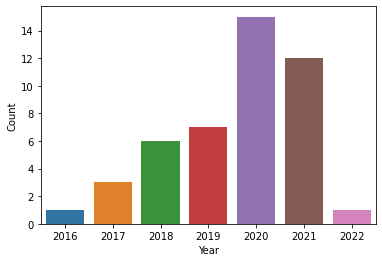

In [94]:
# Bar Graph depicting Year Vs Count of Speaker Launched
sns.barplot(x= "Year",y="Count",data = df_byYear,)

In [95]:
# There are almost 15 models launched in 2020 that is max.